In [55]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn.metrics import precision_score

In [56]:
data = pd.read_csv('heart_failure.csv')

In [57]:
data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [58]:
#checking our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [59]:
#checking for null value in our dataset
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [60]:
#checking no.of row and column in our dataset
data.shape

(299, 13)

**Creating the function for accuracy and confusion matrix**

In [61]:
def Logistic(X_train, X_test, y_train, y_test):
    classification = linear_model.LogisticRegression()
    classification.fit(X_train,y_train)
    y_train_pred = classification.predict(X_train)
    y_test_pred = classification.predict(X_test)
    print("Training accuray score - ",accuracy_score(y_train,y_train_pred))
    print( )
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train,y_train_pred))
    print( )
    print("Precision score for Train data")
    print(precision_score(y_train,y_train_pred))
    print( )
    print("Test accuray score - ",accuracy_score(y_test,y_test_pred))
    print( )
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_test,y_test_pred))
    print( )
    print("Precision score for Test data")
    print(precision_score(y_test,y_test_pred))


**First we make prediction of paintent survival rate using all the column**

In [62]:
X=data.drop('DEATH_EVENT',axis=1)

In [63]:
# Putting target variable to y
y=data['DEATH_EVENT']

In [64]:
X


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [65]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

**Spliting the data in test and train**

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=50)

In [68]:
#Checking Shape of Data
X_train.shape, X_test.shape

((209, 12), (90, 12))

In [69]:
#Checking Shape of Data
y_train.shape,y_test.shape

((209,), (90,))

In [70]:
#Model Training and Evaluation
Logistic(X_train, X_test, y_train, y_test)

Training accuray score -  0.8133971291866029

Train Confusion Matrix:
[[128  15]
 [ 24  42]]

Precision score for Train data
0.7368421052631579

Test accuray score -  0.8555555555555555

Train Confusion Matrix:
[[54  6]
 [ 7 23]]

Precision score for Test data
0.7931034482758621


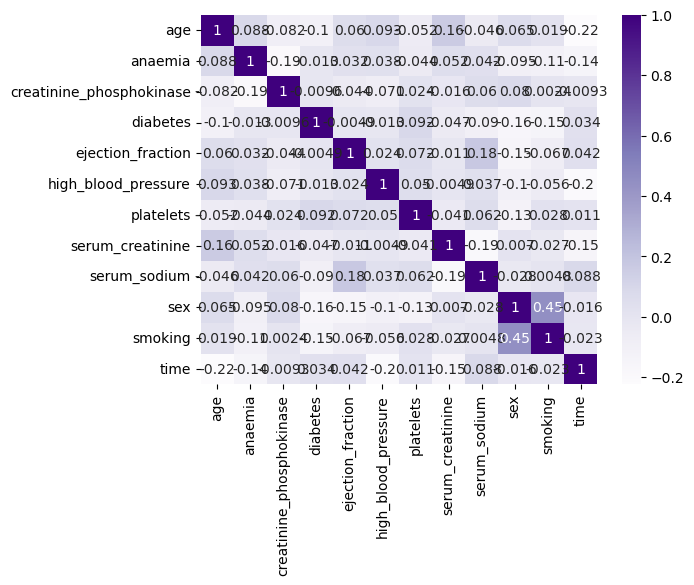

In [71]:
#plotting a heatmap to finding the correlation between coloum
df1 = data.drop(['DEATH_EVENT'],axis=1)
sns.heatmap(df1.corr(), cmap="Purples", annot=True)
plt.show()

**Applying Variance inflation factor (VIF) to remove uncessary coloum**

In [72]:
# Create a copy of df1 and assign it to df2
df2 = df1.copy()

In [73]:
#importing vif from statmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Column_name"] = df2.columns
vif["VIF_value"] = [variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]

#Displaying VIF values
print(vif)

                 Column_name  VIF_value
0                        age  29.114744
1                    anaemia   1.909994
2   creatinine_phosphokinase   1.448473
3                   diabetes   1.789419
4          ejection_fraction  12.081364
5        high_blood_pressure   1.646044
6                  platelets   8.641813
7           serum_creatinine   2.919913
8               serum_sodium  59.151991
9                        sex   3.795155
10                   smoking   1.892753
11                      time   4.351441


**Removing the high vif value column**

In [74]:
#setting threshold value
max_vif = 5

remove_flag = True

while remove_flag:
    vif=pd.DataFrame()
    vif["Column_Name"] = df2.columns
    vif["VIF_value"] = [variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]

    max_vif_column = vif.loc[vif['VIF_value'].idxmax()]

    if max_vif_column['VIF_value'] > max_vif:
        df2=df2.drop(max_vif_column["Column_Name"], axis=1)

    else:
        remove_flag = False




In [75]:
df2

,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,smoking,time
0,0,582,0,1,1.9,1,0,4
1,0,7861,0,0,1.1,1,0,6
2,0,146,0,0,1.3,1,1,7
3,1,111,0,0,1.9,1,0,7
4,1,160,1,0,2.7,0,0,8
...,...,...,...,...,...,...,...,...
294,0,61,1,1,1.1,1,1,270
295,0,1820,0,0,1.2,0,0,271
296,0,2060,1,0,0.8,0,0,278
297,0,2413,0,0,1.4,1,1,280


In [76]:
# Display the shape of df2
df2.shape

(299, 8)

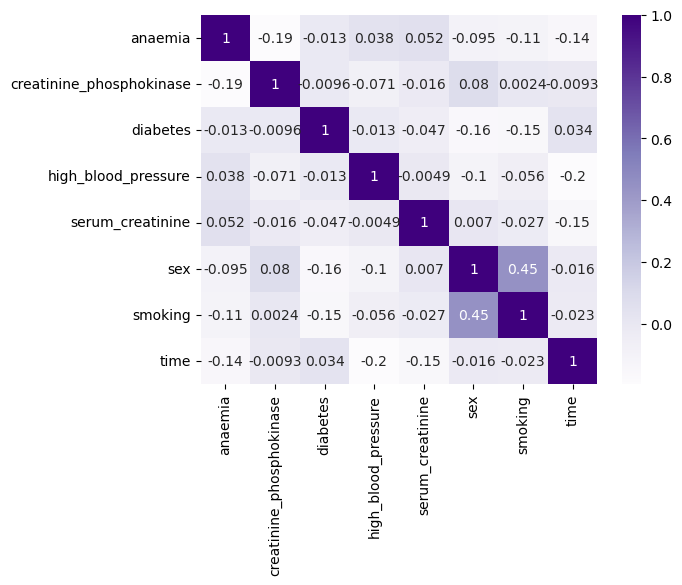

In [77]:
# Generate a heatmap to visualize the correlation matrix of df2
sns.heatmap(df2.corr(), cmap="Purples", annot=True)
# Display the heatmap
plt.show()

In [78]:
# Assign the entire DataFrame df2 to X2 as features
X2=df2

In [79]:
# Assign the 'DEATH_EVENT' column from the data DataFrame to y2 as the target variable
y2=data['DEATH_EVENT']

In [80]:
# Split X2 and y2 into training and testing sets with 70% of the data used for training
# random_state is set to 50 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X2,y2, train_size=0.7, random_state=50)

In [81]:
# Display the feature set X2
X2

,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,smoking,time
0,0,582,0,1,1.9,1,0,4
1,0,7861,0,0,1.1,1,0,6
2,0,146,0,0,1.3,1,1,7
3,1,111,0,0,1.9,1,0,7
4,1,160,1,0,2.7,0,0,8
...,...,...,...,...,...,...,...,...
294,0,61,1,1,1.1,1,1,270
295,0,1820,0,0,1.2,0,0,271
296,0,2060,1,0,0.8,0,0,278
297,0,2413,0,0,1.4,1,1,280


In [82]:
# Display the target variable y2
y2

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [83]:
#Checking Shape of Data
X_train.shape, X_test.shape

((209, 8), (90, 8))

In [84]:
#Checking Shape of Data
y_train.shape,y_test.shape

((209,), (90,))

In [85]:
#Model Training and Evaluation
Logistic(X_train, X_test, y_train, y_test)

Training accuray score -  0.84688995215311

Train Confusion Matrix:
[[135   8]
 [ 24  42]]

Precision score for Train data
0.84

Test accuray score -  0.8333333333333334

Train Confusion Matrix:
[[55  5]
 [10 20]]

Precision score for Test data
0.8


**Applying Principal component analysis**

In [86]:
#principal component analysis is used to reduce dimensions in a data


In [87]:
X2

,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,smoking,time
0,0,582,0,1,1.9,1,0,4
1,0,7861,0,0,1.1,1,0,6
2,0,146,0,0,1.3,1,1,7
3,1,111,0,0,1.9,1,0,7
4,1,160,1,0,2.7,0,0,8
...,...,...,...,...,...,...,...,...
294,0,61,1,1,1.1,1,1,270
295,0,1820,0,0,1.2,0,0,271
296,0,2060,1,0,0.8,0,0,278
297,0,2413,0,0,1.4,1,1,280


In [88]:
#importing StandardScalar for transforming dataset's features so that they are on the  same scale
from sklearn.preprocessing import StandardScaler

In [89]:
#scaling the data
scaler=StandardScaler()
scaler.fit(X2)

StandardScaler()

In [90]:
#transforming scaling data
scaled_data=scaler.transform(X2)

In [91]:
from sklearn.decomposition import PCA

In [92]:
#reducing dimensionality to 4
pca=PCA(n_components=3)

In [93]:
#fiting the scaled_data in pca
pca.fit(scaled_data)

PCA(n_components=3)

In [94]:
#storing transform data in x_pca
x_pca=pca.transform(scaled_data)

In [95]:
#checking shape of the before scaling
scaled_data.shape

(299, 8)

In [96]:
#checking shape of the before scaling
x_pca.shape

(299, 3)

In [97]:
#spliting the data in test and train
X_train, X_test, y_train, y_test = train_test_split(x_pca,y2, train_size=0.7, random_state=50)

In [98]:
#checking train data shape
X_train.shape, X_test.shape

((209, 3), (90, 3))

In [99]:
#checking train data shape
y_train.shape,y_test.shape

((209,), (90,))

In [100]:
#calling funtion and checking the score
Logistic(X_train, X_test, y_train, y_test)

Training accuray score -  0.7559808612440191

Train Confusion Matrix:
[[124  19]
 [ 32  34]]

Precision score for Train data
0.6415094339622641

Test accuray score -  0.7555555555555555

Train Confusion Matrix:
[[54  6]
 [16 14]]

Precision score for Test data
0.7


**USING DECISION TREE**

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2, train_size=0.7, random_state=50)

In [102]:
X_train


,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,smoking,time
138,0,281,1,0,1.00,0,0,108
296,0,2060,1,0,0.80,0,0,278
89,1,115,0,1,1.10,1,0,79
194,0,582,0,1,1.60,1,0,180
157,0,250,0,0,1.00,1,1,120
...,...,...,...,...,...,...,...,...
70,0,148,0,0,0.80,1,1,68
132,0,719,0,1,1.18,0,0,107
289,1,337,0,0,0.90,0,0,256
109,0,292,1,0,1.30,1,1,88


In [103]:
y_train

138    0
296    0
89     0
194    1
157    0
      ..
70     0
132    0
289    0
109    0
176    0
Name: DEATH_EVENT, Length: 209, dtype: int64

In [104]:
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth': [3, 4, 5, 6, 7], 'max_leaf_nodes': [2, 3, 4, 5, 6],'min_samples_split':[20,30,40,50,60,70]}
dt = DecisionTreeClassifier()
dt = GridSearchCV(dt, parameters)

In [105]:
dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6],
                         'min_samples_split': [20, 30, 40, 50, 60, 70]})

In [106]:
dt.best_params_

{'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_split': 20}

In [107]:
dt2 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=2,min_samples_split=20)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=2, min_samples_split=20)

In [108]:
print("training data score: " + str(dt2.score(X_train, y_train)))
print('test data score ' + str(dt2.score(X_test, y_test)))

training data score: 0.84688995215311
test data score 0.8444444444444444


In [109]:
print("Test confusion matrix")
y_pred_test = dt2.predict(X_test)
confusion_matrix(y_test, y_pred_test)

Test confusion matrix


array([[56,  4],
       [10, 20]], dtype=int64)

In [110]:
print("Training confusion matrix")
y_pred_train = dt2.predict(X_train)
confusion_matrix(y_train, y_pred_train)

Training confusion matrix


array([[137,   6],
       [ 26,  40]], dtype=int64)

**Making prediction using only serum creatinine and ejection fraction**

In [111]:
# Prepare a new feature set X3 by dropping several columns from the data DataFrame
X3=data.drop(['age', 'sex' ,'time','DEATH_EVENT','anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','serum_sodium','smoking'],axis=1)

In [112]:
# Display the new feature set X3
X3

,ejection_fraction,serum_creatinine
0,20,1.9
1,38,1.1
2,20,1.3
3,20,1.9
4,20,2.7
...,...,...
294,38,1.1
295,38,1.2
296,60,0.8
297,38,1.4


In [113]:
# Assign the 'DEATH_EVENT' column from the data DataFrame to y3 as the target variable
y3=data['DEATH_EVENT']

In [114]:
# Display the target variable y3
y3

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [115]:
# Split X3 and y3 into training and testing sets with 70% of the data used for training
# random_state is set to 50 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X3,y3, train_size=0.7, random_state=50)

In [116]:
# Display the shape of the test feature set and test target variable
X_test.shape,y_test.shape

((90, 2), (90,))

In [117]:
# Display the shape of the training feature set and training target variable
X_train.shape,y_train.shape

((209, 2), (209,))

In [118]:
# Apply a logistic regression model to the training and testing sets
Logistic(X_train, X_test, y_train, y_test)

Training accuray score -  0.7368421052631579

Train Confusion Matrix:
[[133  10]
 [ 45  21]]

Precision score for Train data
0.6774193548387096

Test accuray score -  0.7555555555555555

Train Confusion Matrix:
[[58  2]
 [20 10]]

Precision score for Test data
0.8333333333333334
